In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

ds_train_titanic = pd.read_csv(r'data\titanic\train.csv')
ds_test_titanic = pd.read_csv(r'data\titanic\test.csv')
ds_train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
ds_train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Checking any null values in the data set
print('Train Dataset: ',ds_train_titanic.isnull().sum())
print('Test Dataset: ',ds_test_titanic.isnull().sum())

Train Dataset:  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Test Dataset:  PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [4]:
#We need to clean the data in both Train and Test datasets.  Let's concat both datasets and clean them.  Once it is
# done, we can separate them into train and test datasets to test with different models.
survived = ds_train_titanic.Survived
ds_train_titanic.drop(['Survived'], axis=1, inplace=True)

In [5]:
full_titanic = pd.concat([ds_train_titanic, ds_test_titanic])
full_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
full_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [7]:
#null values in Age, cabin, Fare & Embarked.  We need to check percentage of data missing to evaluate their influence in the data
print(full_titanic['Age'].isnull().sum())
print('% of missing data: ', round(full_titanic['Age'].isnull().sum()/(full_titanic['Age'].isnull().count())*100,2))


263
% of missing data:  20.09


In [8]:
#We need to replace null values with mean, mode(for categorical) values. We don't need to use "axis" parameter as below equation
# in Series data
full_titanic['Age'].fillna(value=full_titanic['Age'].mean(), inplace=True)

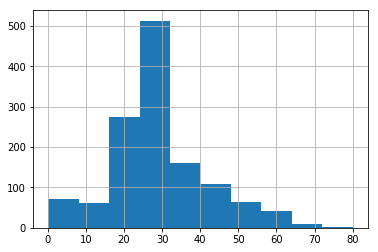

In [9]:
full_titanic.Age.hist()
plt.show()
#Distribution has shifted to right after replacing with mean value and this looks good

In [10]:
#Checking Cabin feature values.
print(full_titanic['Cabin'].isnull().sum())
print('% of missing data: ', round(full_titanic['Cabin'].isnull().sum()/(full_titanic['Cabin'].isnull().count())*100,2))


1014
% of missing data:  77.46


In [11]:
#77% of Cabin data is null values and we should better to drop such columns.
full_titanic.drop(['Cabin'], axis=1, inplace=True)

In [12]:
full_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 112.5+ KB


In [13]:
#We can add Fare null value with average as it is only one value.
full_titanic.Fare.fillna(full_titanic.Fare.mean(), inplace=True)

In [14]:
full_titanic.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [15]:
full_titanic.Embarked.fillna(value='S', inplace=True)

In [16]:
full_titanic.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,3,"Moran, Mr. James",male,29.881138,0,0,330877,8.4583,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


In [17]:
#Name and Ticket features does not have any value in the dataset.  We need to drop them
full_titanic.drop(['Name','Ticket'], axis=1, inplace=True)

In [18]:
full_titanic.tail(20)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
398,1290,3,male,22.000000,0,0,7.7750,S
399,1291,3,male,31.000000,0,0,7.7333,Q
400,1292,1,female,30.000000,0,0,164.8667,S
401,1293,2,male,38.000000,1,0,21.0000,S
402,1294,1,female,22.000000,0,1,59.4000,C
403,1295,1,male,17.000000,0,0,47.1000,S
404,1296,1,male,43.000000,1,0,27.7208,C
405,1297,2,male,20.000000,0,0,13.8625,C
406,1298,2,male,23.000000,1,0,10.5000,S
407,1299,1,male,50.000000,1,1,211.5000,C


In [19]:
#Replace Siblings and Parents with Family by adding them
full_titanic['Family'] = full_titanic['SibSp'] + full_titanic['Parch']
full_titanic.drop(['SibSp', 'Parch'], axis=1, inplace=True)
full_titanic.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family
0,1,3,male,22.0,7.2500,S,1
1,2,1,female,38.0,71.2833,C,1
2,3,3,female,26.0,7.9250,S,0
3,4,1,female,35.0,53.1000,S,1
4,5,3,male,35.0,8.0500,S,0


In [20]:
#We need to convert Sex and Embarked category values to Numeric values using pd.get_dummies
full_titanic = pd.get_dummies(full_titanic, columns = ['Sex', 'Embarked'])
full_titanic.head()

,PassengerId,Pclass,Age,Fare,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,7.2500,1,0,1,0,0,1
1,2,1,38.0,71.2833,1,1,0,1,0,0
2,3,3,26.0,7.9250,0,1,0,0,0,1
3,4,1,35.0,53.1000,1,1,0,0,0,1
4,5,3,35.0,8.0500,0,0,1,0,0,1


In [21]:
#We can drop any Sex attribute.  Because any one column can represent both male and female.  
#This is not possible in the case of Embarked feature.
full_titanic.drop(['Sex_female'], axis=1, inplace=True)
full_titanic.head()

,PassengerId,Pclass,Age,Fare,Family,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,7.2500,1,1,0,0,1
1,2,1,38.0,71.2833,1,0,1,0,0
2,3,3,26.0,7.9250,0,0,0,0,1
3,4,1,35.0,53.1000,1,0,0,0,1
4,5,3,35.0,8.0500,0,1,0,0,1


In [22]:
#Data looks good.  Now we need to split full_titanic into original train and test data sets. Add the survived featue
#to x_train dataset
print("Original dataset size\n-----------------------")
print('Train size: ',ds_train_titanic.shape)
print('Test size: ',ds_test_titanic.shape)

print("Final dataset size\n--------------------")
x_train = full_titanic.iloc[:891]
y_train = survived
x_test = full_titanic.iloc[891:]
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
x_train.head()

Original dataset size
-----------------------
Train size:  (891, 11)
Test size:  (418, 11)
Final dataset size
--------------------
x_train:  (891, 9)
x_test:  (418, 9)


,PassengerId,Pclass,Age,Fare,Family,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,7.2500,1,1,0,0,1
1,2,1,38.0,71.2833,1,0,1,0,0
2,3,3,26.0,7.9250,0,0,0,0,1
3,4,1,35.0,53.1000,1,0,0,0,1
4,5,3,35.0,8.0500,0,1,0,0,1


In [23]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
kfold=10
scoring='accuracy'
seed = 1
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.800225 (0.019960)
LDA: 0.799101 (0.029492)
KNN: 0.601610 (0.088589)
CART: 0.764395 (0.055698)
NB: 0.787978 (0.044396)
SVM: 0.616217 (0.070492)


In [24]:
#Based on above accurcy, LR is giving more predectivity values. Let's try with test data to check its accuracy.
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_model.score(x_train, y_train)
y_pred = lr_model.predict(x_test)
y_test = pd.read_csv(r'data\titanic\gender_submission.csv')
y_test = y_test.Survived
print('Accuracy score: ',accuracy_score(y_test, y_pred))
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification report:\n',classification_report(y_test, y_pred))

Accuracy score:  0.9449760765550239
Confusion matrix:
 [[250  16]
 [  7 145]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       266
           1       0.90      0.95      0.93       152

   micro avg       0.94      0.94      0.94       418
   macro avg       0.94      0.95      0.94       418
weighted avg       0.95      0.94      0.95       418

